# Toppgene Results

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import csv
import pickle


In [17]:
ToppgeneDir='/home/user/2020/PythonScripts/Toppgene/Results'

In [20]:
Datadir='/home/user/2019/Projects/PhD/prioritize/Data'

# Test genes

In [21]:
ls_test_genes_file = os.path.join(Datadir, 'cancer_genes.pk')
# with open

In [22]:
with open(ls_test_genes_file, 'rb') as infile:
    ls_test_genes = pickle.load(infile)

In [23]:
ls_test_genes

['ATM',
 'BARD1',
 'BRIP1',
 'CASP8',
 'CTLA4',
 'CYP19A1',
 'FGFR2',
 'LSP1',
 'MAP3K1',
 'NBN',
 'RAD51',
 'TERT',
 'PALB2',
 'CHEK2',
 'CDH1',
 'PTEN',
 'STK11',
 'TP53',
 'BRCA1',
 'BRCA2']

In [33]:
dict_ranks ={}
for file in os.listdir(ToppgeneDir)[:100]:
    with open(os.path.join(ToppgeneDir, file)) as infile:
        csv_reader = csv.DictReader(infile)
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
#                 print(f"Column names: {', '.join(row)}")
                line_count += 1
            gene, rank = row['GeneSymbol'], row['Rank']
            if gene in ls_test_genes:
                if gene not in dict_ranks:
                    dict_ranks[gene]=[rank]
                else:
                    dict_ranks[gene].append(rank)
            
        

In [25]:
for k, v in dict_ranks.items():
    print(f"{k}\t{v}")

NBN	['1', '1', '4', '2', '2', '1', '1', '3', '3', '2']
RAD51	['2', '2', '3', '4', '3', '4', '4', '4', '4', '1']
BARD1	['3', '3', '1', '3', '1', '2', '2', '1', '1', '4']
ATM	['4', '4', '2', '1', '4', '3', '3', '2', '2', '3']
BRIP1	['5', '5', '5', '5', '6', '5', '6', '5', '5', '5']
TP53	['6', '6', '6', '6', '5', '6', '5', '6', '6', '6']
CHEK2	['7', '7', '7', '7', '7', '7', '7', '7', '7', '7']
TERT	['8', '8', '8', '8', '8', '8', '8', '8', '8', '8']
CASP8	['9', '9', '9', '9', '9', '9', '10', '9', '9', '9']
PTEN	['10', '10', '10', '10', '10', '10', '11', '10', '10', '10']
PALB2	['11', '12', '11', '11', '11', '11', '12', '11', '11', '12']
STK11	['12', '13', '12', '12', '12', '12', '13', '12', '12', '11']
CDH1	['13', '14', '13', '14', '14', '14', '16', '13', '13', '14']
MAP3K1	['14', '15', '14', '13', '13', '13', '15', '14', '14', '13']
FGFR2	['15', '16', '15', '15', '15', '15', '18', '15', '15', '16']
CYP19A1	['16', '17', '16', '16', '18', '16', '19', '16', '16', '17']
CTLA4	['19', '19', '17

In [34]:
df = pd.DataFrame.from_dict(dict_ranks)

In [27]:
df.head()

,NBN,RAD51,BARD1,ATM,BRIP1,TP53,CHEK2,TERT,CASP8,PTEN,PALB2,STK11,CDH1,MAP3K1,FGFR2,CYP19A1,CTLA4,LSP1
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,19,22
1,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,19,21
2,4,3,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,19
3,2,4,3,1,5,6,7,8,9,10,11,12,14,13,15,16,18,20
4,2,3,1,4,6,5,7,8,9,10,11,12,14,13,15,18,20,21


In [35]:
df_T = df.T

In [36]:
df_T.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
NBN,1,1,4,2,2,1,1,3,3,2,...,3,3,2,3,3,3,1,2,2,4
RAD51,2,2,3,4,3,4,4,4,4,1,...,4,4,3,4,2,1,2,4,3,1
BARD1,3,3,1,3,1,2,2,1,1,4,...,1,1,1,1,1,2,3,1,1,2
ATM,4,4,2,1,4,3,3,2,2,3,...,2,2,4,2,4,4,4,3,4,3
BRIP1,5,5,5,5,6,5,6,5,5,5,...,6,5,5,5,6,5,5,5,5,5


In [37]:
df_T_med = df_T.median(axis=1)

In [42]:
df_T_avg = df_T.median(axis=1)

In [48]:
df_T_med.describe()

count    18.000000
mean      9.805556
std       5.869009
min       1.000000
25%       5.250000
50%       9.500000
75%      14.000000
max      21.000000
dtype: float64

In [49]:
df_T_avg.describe()

count    18.000000
mean      9.805556
std       5.869009
min       1.000000
25%       5.250000
50%       9.500000
75%      14.000000
max      21.000000
dtype: float64

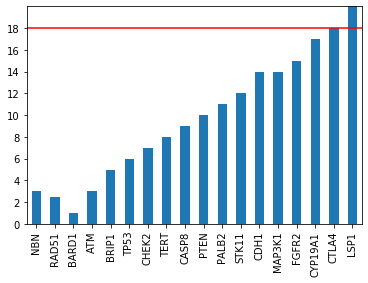

In [41]:
plt.ylim(0,20)
plt.axhline(y=18, color='r', linestyle='-')
plt.yticks(range(0,20, 2))
df_T_med.plot(kind='bar');

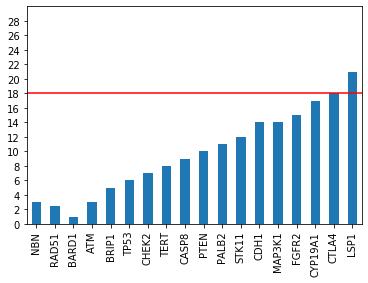

In [46]:
plt.ylim(0,30)
plt.axhline(y=18, color='r', linestyle='-')
plt.yticks(range(0,30, 2))
df_T_avg.plot(kind='bar');

In [13]:
38/833*100

4.561824729891957